In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
#load dataset
from sklearn import datasets
iris=datasets.load_iris()

In [ ]:
df=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df['class']=iris.target

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.shape

(150, 5)

In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class             int64
dtype: object

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.groupby('class').size()

class
0    50
1    50
2    50
dtype: int64

In [ ]:
df['class']=df['class'].replace([0,1,2],['setosa', 'versicolor', 'virginica'])

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

Visualization:-

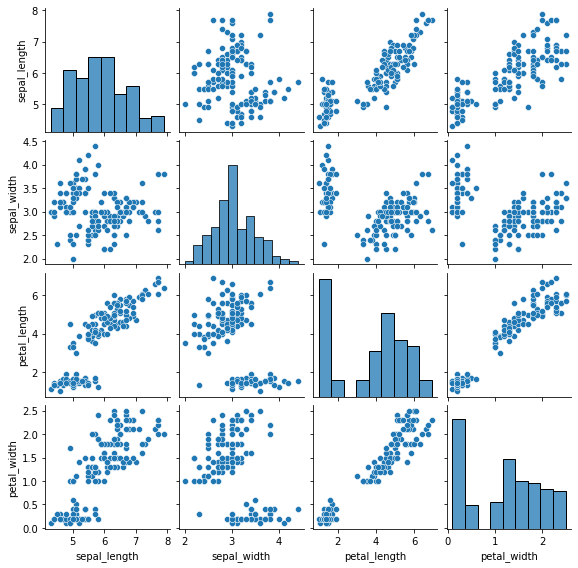

In [ ]:
#pairwise plot
sns.pairplot(df.drop('class',1),height=2)

In [ ]:
X=df.drop('class',1)
y=df['class']

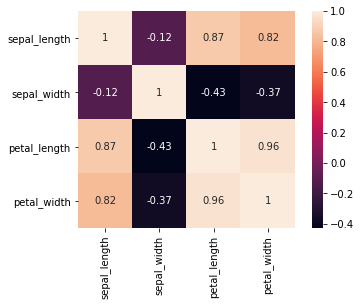

In [ ]:
#heatmap
sns.heatmap(X.corr(),annot=True,square=True)

In [ ]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [ ]:
#logistic regression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor'], dtype=object)

In [ ]:
accuracy_score(y_test,y_pred)

0.9111111111111111

In [ ]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0, 14,  2],
       [ 0,  2, 15]])

In [ ]:
#decision tree
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
pred=mod_dt.predict(X_test)

In [ ]:
pred

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor'],
      dtype=object)

In [ ]:
accuracy_score(y_test,pred)

0.8888888888888888

In [ ]:
confusion_matrix(y_test,pred)

array([[12,  0,  0],
       [ 0, 14,  2],
       [ 0,  3, 14]])

In [ ]:
#dumping model
pickle.dump(logreg,open('log_model.pkl','wb'))

In [ ]:
pickle.dump(mod_dt,open('dtree_model.pkl','wb'))